In [87]:
import numpy as np 
from ampl_tools import R_generate_network 

circ = R_generate_network(6,8)
num_CX = dict(circ.decompose(reps=4).count_ops())["cx"]
num_gates = num_CX + dict(circ.decompose(reps=4).count_ops())["u"]

weights = np.load("ampl_outputs/weights_6_8_800_x76_MSE_40_168_.npy")

len(weights)

num_CX

168

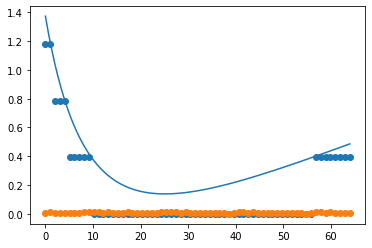

[0.00856671 0.01122041 0.00683946 0.009252   0.00539305 0.00818432
 0.00337288 0.00592851 0.01214648 0.01452371 0.01081793 0.01293778
 0.00799417 0.01052327 0.00634823 0.00862509 0.00841133 0.01106717
 0.00669588 0.00911044 0.00522852 0.00802146 0.00321984 0.00577704
 0.01200022 0.01437394 0.01068412 0.01280036 0.00783774 0.01036279
 0.00620396 0.00847668 0.00650404 0.00888364 0.00546849 0.00760627
 0.00321474 0.00573775 0.00188528 0.00417186 0.01031423 0.01240261
 0.00967868 0.01150898 0.00604702 0.00829282 0.00509312 0.00708583
 0.00636232 0.00874394 0.00533857 0.00747826 0.00306358 0.00558816
 0.00174562 0.00403367 0.01018224 0.01226704 0.00955914 0.01138576
 0.0059046  0.00814628 0.00496287 0.00695138]


In [66]:
"""
DO NOT DELETE THIS !!!

"""

from tools import psi, bin_to_dec, dec_to_bin 
import numpy as np 
import matplotlib.pyplot as plt 

m =4

x = np.linspace(0,2**6,100)
xs = np.linspace(0,2**6,2**6)
y = np.array([psi(i) for i in x])
ys = np.array([psi(i) for i in xs])

y_reduced = np.modf(ys / (2* np.pi))[0] 
y_reduced_bin = [dec_to_bin(i,m, "unsigned mag", 0) for i in y_reduced]
y_reduced_dec =  np.array([bin_to_dec(i,"unsigned mag", 0) for i in y_reduced_bin])

y_rounded = 2 * np.pi * y_reduced_dec

plt.plot(x,y)
plt.scatter(xs,y_rounded)
plt.scatter(xs,phi)
plt.show()

"""
DO NOT DELETE THIS !!!

"""

print(phi)

In [62]:
from tools import full_encode 

weights_A ="ampl_outputs/weights_6_8_800_x76_MSE_40_168_.npy"
weights_p="outputs/weights_6_4(0)_3_1000_x_L1_(S)(PR)(r).npy"
name = "FIRST_TEST"

full_encode(6,4, weights_A, weights_p, 8, 3,True, name)

0

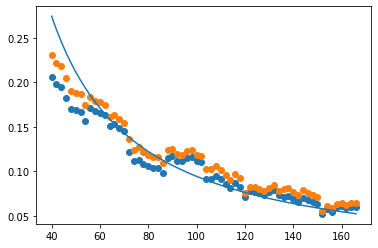

0.832386369452736

In [65]:
import numpy as np
import matplotlib.pyplot as plt 

vec = np.load("FIRST_TEST.npy")

vec2 = np.abs(np.load("ampl_outputs/statevec_6_8_800_x76_MSE_40_168_.npy"))

phi =np.angle(vec)
phi = phi + 2* np.pi * (phi < 0).astype(int)
phi *= (np.abs(vec) > 1e-15).astype(float)



mag = np.abs(vec) 

n = 6
x_min = 40
x_max = 168 

dx = (x_max-x_min)/(2**n)
x = np.arange(x_min,x_max, dx)

target_arr = np.array([i**(-7./6) for i in x])**2
target_arr = target_arr / np.sum(target_arr)

target_arr= np.sqrt(target_arr)

plt.scatter(x,mag)
plt.scatter(x,vec2)
plt.plot(x,target_arr)

plt.show()

np.sum(np.abs(vec)**2)



                                            ░                      
 input_0: ────────────────■─────────────────░──────────────────────
                          │                 ░                      
 input_1: ────────────────┼──────────■──────░──────────────────────
          ┌─────────┐┌────┴────┐     │      ░ ┌───┐┌─────────┐     
target_0: ┤ U2(0,π) ├┤ Ry(1.0) ├─────┼──────░─┤ X ├┤ Ry(1.0) ├──■──
          ├─────────┤└─────────┘┌────┴────┐ ░ └─┬─┘├─────────┤┌─┴─┐
target_1: ┤ U2(0,π) ├───────────┤ Ry(1.0) ├─░───■──┤ Ry(1.0) ├┤ X ├
          └─────────┘           └─────────┘ ░      └─────────┘└───┘


In [25]:
from tools import extract_phase, A_generate_network
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.circuit.library import HGate

def qubit_to_phase(circ, qreg, nint=None, wrap=False, inverse=False, phase=False, factor=1, label='Amp2Phase'):
    r"""
    |qreg> -> e^(2pi i qreg)|qreg>
    """
    n = len(qreg)

    if inverse:
        wrap = True

    if wrap:
        qreg = QuantumRegister(n, 'q_reg')
        circ = QuantumCircuit(qreg)

    if phase:
        n -= 1

    if nint==None:
        nint = n

    for k in np.arange(1,n-nint+1):
        lam = 2.*np.pi*(2.**(-k))*factor
        qubit = n-nint-k
        circ.p(lam,qreg[qubit])

    #if phase:
    #    phase_gate = qubit_to_phase(circ, qreg[:-1], nint=nint, factor=-2, wrap=True, phase=False).control(1)
    #    circ.append(phase_gate, [qreg[-1], *qreg[:-1]]);

    if wrap:
        circ = circ.to_gate()
        circ.label = label

    if inverse:
        circ = circ.inverse()
        circ.label = label+'†'
    
    return circ

n =2 
m = 2

# set up registers 
#input_register = QuantumRegister(n, "input")
target_register = QuantumRegister(m, "target")
#circuit = QuantumCircuit(input_register, target_register) 

circuit = QuantumCircuit(target_register) 



"""
# load weights 
weights_A = np.load(weights_A_str)
weights_p = np.load(weights_p_str)


# encode amplitudes 
circuit.compose(A_generate_network(n, L_A), input_register, inplace=True)
circuit = circuit.assign_parameters(weights_A)

# evaluate function
qc = generate_network(n,m, L_p, real=real_p)
qc = qc.assign_parameters(weights_p)
inv_qc = qc.inverse()
circuit.compose(qc, [*input_register,*target_register], inplace=True) 
"""
# extract phases 

#circuit.h(input_register)
#circuit.h([*input_register, *target_register])
#circuit.compose(qc, target_register, inplace=True)

circuit.ry(theta=np.pi/4,qubit=target_register)

circuit.compose(extract_phase(m),target_register, inplace=True) 

#phase_gates = qubit_to_phase(circuit, target_register, 0, wrap=True, phase=True, factor=1)
#circuit.compose(phase_gates, target_register, inplace=True)

#circuit.ry(theta=-np.pi/4,qubit=target_register)


#circuit.compose(extract_phase(m).inverse(),target_register, inplace=True) 
#circuit.compose(qc_inv, target_register, inplace=True)
#circuit.h(target_register)



"""
# clear ancilla register 
circuit.compose(inv_qc, [*input_register,*target_register], inplace=True) 
"""
# get resulting statevector 
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
state_vector = result.get_statevector()

state_vector = np.asarray(state_vector) #.reshape((2**m,2**n))
#state_v = state_vector[:,0].flatten()

#print(np.angle(state_v))
#print(np.abs(state_v)**2)

print("")
print(np.round(np.abs(state_vector)**2,4))
print(np.round(np.angle(state_vector)/ (2*np.pi),4))



[0.7286 0.125  0.125  0.0214]
[ 0.    0.25 -0.5  -0.25]


In [75]:
np.ones((1,3))

array([[1., 1., 1.]])

In [87]:
from tools import extract_phase, A_generate_network
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute

circ = QuantumCircuit(4)

#circ.h(circ.qubits[:])

#circ.x(circ.qubits[2:4])

circ.h(circ.qubits[0:2])

#####
circ.p(2*np.pi * 2**(-3), circ.qubits[0])
circ.p(2*np.pi * 2**(-2), circ.qubits[1])
#circ.p(2*np.pi * 2**(-1), circ.qubits[2])

#circ.compose(qubit_to_phase(circ, circ.qubits, 0, wrap=True, phase=False, factor=1),circ.qubits, inplace=True)
#circ.compose(extract_phase(3),circ.qubits, inplace=True) 

#circ.x(circ.qubits[0])

#circ.h(circ.qubits[:])

backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
state_vector = result.get_statevector()
state_vector = np.asarray(state_vector)

phi = np.angle(state_vector)
phi = phi + 2* np.pi * (phi < 0).astype(int)
phi = phi / (2* np.pi)
phi *= (np.abs(state_vector) > 1e-15).astype(float)

print(np.abs(state_vector)**2)
print("")
print(phi)

[0.25 0.25 0.25 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]

[0.    0.125 0.25  0.375 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


array([0, 0, 0, 0, 0, 0, 0, 0])